In [15]:
import pandas as pd
#import spacy
#import umap
#import matplotlib.pyplot as plt
#%matplotlib inline
#nlp = spacy.load('da_core_news_sm')
import datetime
from dateutil.parser import parser
import re

In [182]:
## Install libraries
! python -m pip install --upgrade pip --quiet
! pip install spacy --quiet
! pip3 install spacy-transformers --quiet
! python -m spacy download da_core_news_trf --quiet
! pip install umap-learn --quiet
! python -m spacy download da_core_news_sm --quiet

In [3]:
df = pd.read_csv('data/data.csv')

In [78]:
df['published'].iloc[-5]# .apply(parse_date)

nan

In [76]:
def parse_date(date_string):
    date_string = date_string.lower().strip()

    # replace today
    today_date = datetime.date.today()
    for today in ['idag','i dag']:
        date_string = date_string.replace(today, today_date.strftime('%d.%m.%Y'))

    # replace yesterday
    yesterday_date = datetime.date.today() + datetime.timedelta(days=1)
    for yesterday in ['igår','i går']:
        date_string = date_string.replace(yesterday, yesterday_date.strftime('%d.%m.%Y'))

    # if minutes ago
    min_regex = r"\d+(?=\smin)"
    if re.match(min_regex,date_string):
        minutes_ago = int(re.match(min_regex,date_string).group(0))
        timestamp = datetime.datetime.now() - datetime.timedelta(minutes=minutes_ago)

    p = parser()
    timestamp = p.parse(date_string, dayfirst=True, fuzzy=True)


    return timestamp.strftime('%d.%m.%Y %H:%M')

In [178]:
def get_embeddings(text):
    return nlp(text).vector

df['emb'] = df['title'].apply(get_embeddings)

In [201]:
reducer = umap.UMAP(
    n_neighbors=5,
    min_dist=0.05,
    n_components=2,
    metric='euclidean'
)

emb_2d = reducer.fit_transform(df['emb'].tolist())

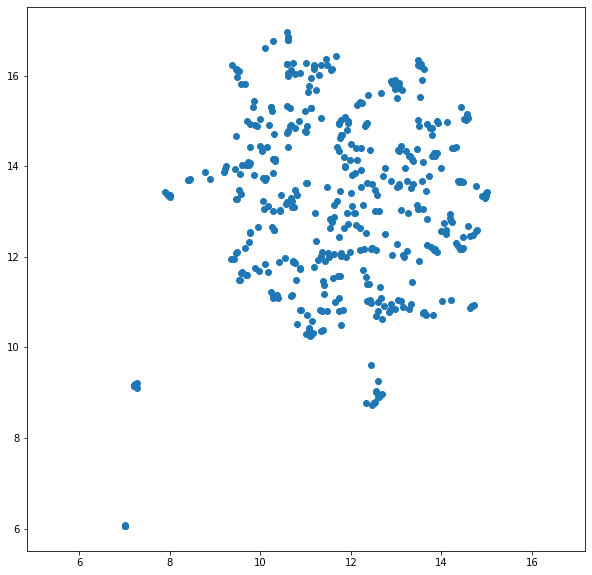

In [202]:
plt.subplots(figsize=[10,10])

plt.scatter(
    emb_2d[:, 0],
    emb_2d[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')